### **Índice do documento** 
    
4. [Model Devepolment](#4.-Model-Devepolment)

    4.1 [Split the data into training, validation, and test sets](#4.1-)
    
    4.2 [Time Windowing](#4.2-)
    
    

Time Windowing: 
+ Segment the time series data into fixed-size windows (e.g., 1 second, 5 seconds).
+ Experiment with different window sizes to see their impact on model performance.

1. Model Architecture Design

+ Design RNN-based models using different types of layers:
    * Traditional RNN layers
    * Long Short-Term Memory (LSTM) layers
+ Define multiple architectures, e.g., a simple RNN, a single-layer LSTM, and a multi-layer LSTM.

2. Model Implementation

+ Implement the models using a deep learning framework such as TensorFlow or PyTorch.
+ Compile the models with appropriate loss functions and optimizers (e.g., categorical cross-entropy, Adam).

3. Model Training

+ Train the models on the training set with different configurations of RNN layers and time windows.
+ Use validation data to tune hyperparameters and avoid overfitting.
+ Save the model weights and training logs for analysis.

In [1]:
import os 
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Definir o caminho do arquivo relativo ao diretório do script
#file_path = os.path.join(os.getcwd(), 'RNN_dataset', 'concatDataset.csv')

base_dir = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets'
file_name = 'preprocessDataset.csv'

file_path = os.path.join(base_dir, file_name)
print(file_path)

C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets\preprocessDataset.csv


In [3]:
df_motionSense = pd.read_csv(file_path)

In [4]:
df_motionSense.head(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,category_encoded
0,1.021959,1.107385,0.417181,2.406195,-0.829476,0.358419,0.201954,0.523800,1.149716,0.877204,-0.498997,0.725271,0
1,1.021865,1.153671,0.405934,2.444120,-0.881869,0.356343,0.541955,0.276988,0.671182,0.661825,-0.067095,0.090614,0
2,1.021713,1.181012,0.401818,2.466163,-0.913179,0.354734,-0.092472,-0.047588,0.344296,0.066402,0.126678,-0.592361,0
3,1.014353,1.187365,0.404709,2.469880,-0.920496,0.324710,-0.019243,-0.750886,0.009028,0.011899,0.130769,0.042514,0
4,0.999076,1.189446,0.403053,2.467690,-0.922890,0.262797,0.070893,-0.656115,0.021537,0.604865,0.556535,-0.293948,0


**Splitting Data for Machine Learning**

The following code uses the 'train_test_split' function from scikit-learn to divide the dataset into training and testing sets. It separates the input features ('x_columns') and the target variable ('y_columns') with a 20% test set size, ensuring that the lengths of the training sets for both features and labels are the same, as asserted.

**Sequencing Data for Temporal Analysis**

We define a sequence generator function that creates sequences of input features and corresponding target labels from the training and testing data. These sequences have a window length of 150 with a stride of 10. The mode of target labels within each sequence is calculated to represent the label for that sequence. This prepares the data for temporal analysis tasks.

In [5]:
# Generate time series data
def create_sequences(data, target, window_size):
    sequences = []
    targets = []
    
    for i in range(len(data) - window_size):
        #Caso queiramos ver melhor e passar para o dataset substituimos pelo iloc...
        seq = data[i:i+window_size]#.iloc[i:i+window_size].values 
        label = target[i+window_size]#.iloc[i+window_size]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

In [6]:
y = df_motionSense['category_encoded']
X= df_motionSense.drop(columns=['category_encoded'])

In [7]:
# Definir parâmetros
WINDOW_LENGTH = 20
STRIDE_LENGTH = 10
NUM_CLASSES = y.nunique()
NUM_FEATURES = X.shape[1]
BATCH_SIZE = 32
EPOCHS_SIZE = 10

In [8]:
X_seq, y_seq = create_sequences(X, y, WINDOW_LENGTH)

+ Divisão do *Dataset* em conjuntos de treino e teste utilizando o `train_test_split` da biblioteca sklearn

In [9]:
# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)#, stratify=encoded_labels)
#parâmetros: stratify = encoded_labels

assert(len(X_train) == len(y_train))

+ Verificação do tamanho das novas variáveis

In [11]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))

print("\n")

print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))

print("\n")

print("Train proportion: {:.0%}".format(len(X_train) / (len(X_train) + len(X_test))))
print("Test proportion: {:.0%}".format(len(X_test) / (len(X_train) + len(X_test))))

Size of X_train: 506727
Size of y_train: 506727


Size of X_test: 126682
Size of y_test: 126682


Train proportion: 80%
Test proportion: 20%


**One-Hot Encoding Target Labels**

In this code, the 'to_categorical' function from Keras is used to perform one-hot encoding on the target labels. This transforms the single integer labels into binary arrays, making them suitable for multi-class classification tasks with a total of 6 classes (NUM_CLASSES = 6).

In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

**Defining LSTM-based Deep Learning Model**

This code snippet utilizes the Keras library to build a deep learning model for sequence classification. The model includes an LSTM layer with 6 units, followed by a flattening layer, a dense layer with 128 neurons and ReLU activation, and a final output layer with softmax activation for multi-class classification. The model is compiled using categorical cross-entropy loss and the Adam optimizer. A summary of the model architecture is displayed.

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


model = Sequential()
model.add(SimpleRNN(100, input_shape=(WINDOW_LENGTH, X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        11,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,803 (46.11 KB)

 Trainable params: 11,803 (46.11 KB)

 Non-trainable params: 0 (0.00 B)

**Training the LSTM Model**

This code trains the previously defined LSTM-based deep learning model. It uses the training sequences 'tx' and their corresponding one-hot encoded labels 'tty' with a specified number of epochs ('EPOCHS_SIZE') and batch size ('BATCH_SIZE'). The training progress and performance metrics are stored in the 'history' variable for analysis.

In [16]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 154s 7ms/step - accuracy: 0.9086 - loss: 0.2724 - val_accuracy: 0.9996 - val_loss: 0.0021
Epoch 2/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 137s 7ms/step - accuracy: 0.9763 - loss: 0.0807 - val_accuracy: 0.9648 - val_loss: 0.1486
Epoch 3/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 140s 7ms/step - accuracy: 0.9494 - loss: 0.1731 - val_accuracy: 0.9064 - val_loss: 0.3000
Epoch 4/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 138s 7ms/step - accuracy: 0.9281 - loss: 0.2221 - val_accuracy: 0.9823 - val_loss: 0.0551
Epoch 5/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 139s 7ms/step - accuracy: 0.9799 - loss: 0.0658 - val_accuracy: 0.9979 - val_loss: 0.0074
Epoch 6/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 138s 7ms/step - accuracy: 0.9729 - loss: 0.0885 - val_accuracy: 0.9599 - val_loss: 0.1042
Epoch 7/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 145s 7ms/step - accuracy: 0.9084 - loss: 0.2780 - val_accuracy: 0.9900 - val_loss: 0.0320
Epoch 8/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 162s 8ms/step - ac

**Evaluating the LSTM Model**

This following code evaluates the trained LSTM model using the validation sequences 'vx' and their corresponding one-hot encoded labels 'vvy' with a batch size of 'BATCH_SIZE'. It calculates and returns evaluation metrics to assess the model's performance on the validation data.

5252/5252 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9628 - loss: 0.1169
Test loss: 0.11730041354894638, Test accuracy: 0.9625850319862366


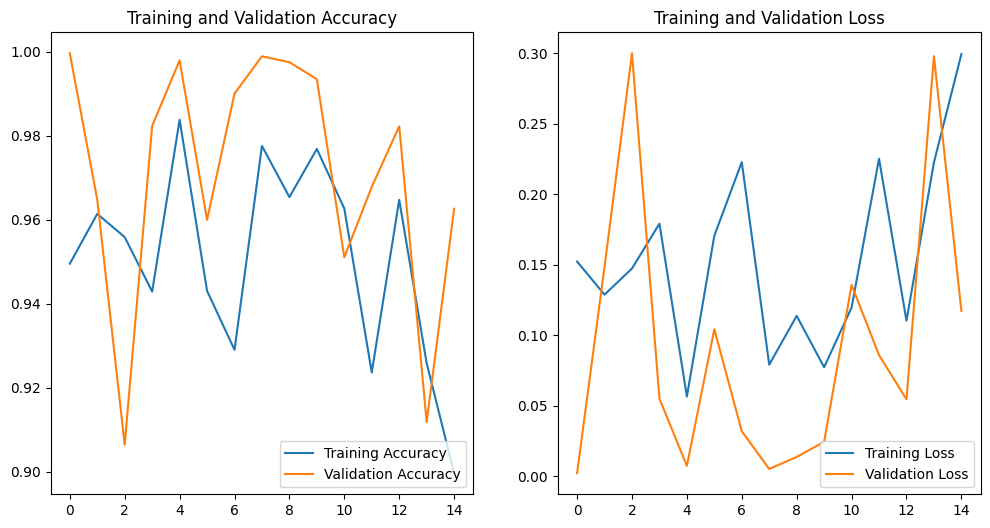

In [19]:
# Evaluate the model
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
#EPOCHS=15
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS_SIZE),acc, label="Training Accuracy")
plt.plot(range(EPOCHS_SIZE),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS_SIZE),loss, label="Training Loss")
plt.plot(range(EPOCHS_SIZE),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

# Definição da arquitetura da rede neural
model = Sequential()

# Primeira camada RNN
model.add(SimpleRNN(100, input_shape=(WINDOW_LENGTH, X_train.shape[2]), return_sequences=True))

# Segunda camada RNN
model.add(SimpleRNN(100))

# Dropout para regularização
model.add(Dropout(0.5))

# Camada de saída
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilação do modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Sumário do modelo
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 100)        │        11,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,903 (124.62 KB)

 Trainable params: 31,903 (124.62 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 252s 12ms/step - accuracy: 0.9239 - loss: 0.2394 - val_accuracy: 0.9644 - val_loss: 0.1213
Epoch 2/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 256s 12ms/step - accuracy: 0.9744 - loss: 0.0862 - val_accuracy: 0.9981 - val_loss: 0.0087
Epoch 3/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 284s 14ms/step - accuracy: 0.9939 - loss: 0.0265 - val_accuracy: 0.9967 - val_loss: 0.0113
Epoch 4/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 270s 13ms/step - accuracy: 0.9921 - loss: 0.0309 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 5/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 256s 12ms/step - accuracy: 0.9978 - loss: 0.0098 - val_accuracy: 0.8483 - val_loss: 0.6680
Epoch 6/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 253s 12ms/step - accuracy: 0.9355 - loss: 0.2151 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 7/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 355s 17ms/step - accuracy: 0.9731 - loss: 0.0945 - val_accuracy: 0.9940 - val_loss: 0.0268
Epoch 8/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 324s 15ms/s

5252/5252 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.9535 - loss: 0.1275
Test loss: 0.12930159270763397, Test accuracy: 0.9525827169418335


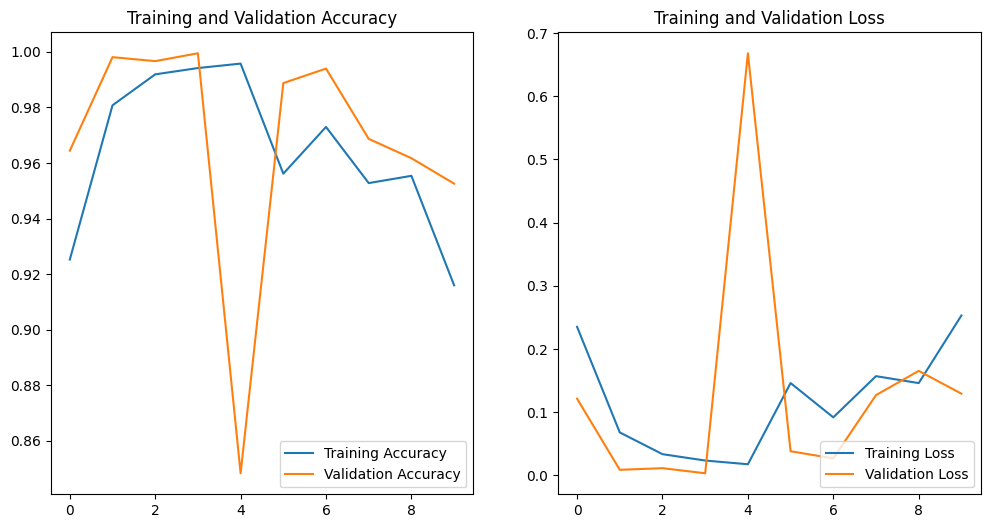

In [24]:
# Evaluate the model
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
#EPOCHS=15
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS_SIZE),acc, label="Training Accuracy")
plt.plot(range(EPOCHS_SIZE),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS_SIZE),loss, label="Training Loss")
plt.plot(range(EPOCHS_SIZE),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [16]:
# Definição da arquitetura da rede neural
model = Sequential()

# Primeira camada RNN com ativação 'tanh'
model.add(SimpleRNN(50, input_shape=(WINDOW_LENGTH, X_train.shape[2]), activation='tanh', return_sequences=True))

# Dropout para regularização
model.add(Dropout(0.5))

# Segunda camada RNN com ativação 'tanh'
model.add(SimpleRNN(50, activation='tanh'))

# Dropout para regularização
model.add(Dropout(0.5))

# Camada de saída
model.add(Dense(y_train.shape[1], activation='softmax'))


# Compilação do modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Sumário do modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 20, 50)         │         3,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,353 (32.63 KB)

 Trainable params: 8,353 (32.63 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 135s 8ms/step - accuracy: 0.7883 - loss: 0.5516 - val_accuracy: 0.9167 - val_loss: 0.2726
Epoch 2/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 119s 8ms/step - accuracy: 0.9075 - loss: 0.3047 - val_accuracy: 0.9130 - val_loss: 0.2915
Epoch 3/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 189s 12ms/step - accuracy: 0.9153 - loss: 0.2839 - val_accuracy: 0.9319 - val_loss: 0.2295
Epoch 4/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 137s 9ms/step - accuracy: 0.9179 - loss: 0.2780 - val_accuracy: 0.9302 - val_loss: 0.2325
Epoch 5/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 119s 7ms/step - accuracy: 0.9186 - loss: 0.2736 - val_accuracy: 0.9354 - val_loss: 0.2255
Epoch 6/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 94s 6ms/step - accuracy: 0.9162 - loss: 0.2803 - val_accuracy: 0.9263 - val_loss: 0.2477
Epoch 7/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - accuracy: 0.9115 - loss: 0.2923 - val_accuracy: 0.8985 - val_loss: 0.3048
Epoch 8/10
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 94s 6ms/step - accu

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9217 - loss: 0.2613
Test loss: 0.259573370218277, Test accuracy: 0.9223488569259644


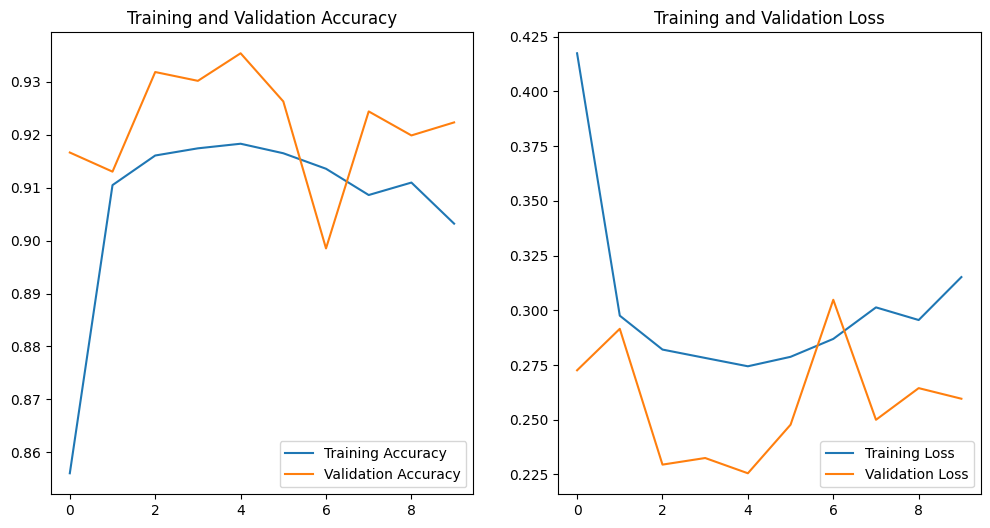

In [18]:
# Evaluate the model
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
#EPOCHS=15
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS_SIZE),acc, label="Training Accuracy")
plt.plot(range(EPOCHS_SIZE),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS_SIZE),loss, label="Training Loss")
plt.plot(range(EPOCHS_SIZE),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [21]:
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 89s 6ms/step - accuracy: 0.9094 - loss: 0.3019 - val_accuracy: 0.9140 - val_loss: 0.2830
Epoch 2/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 136s 9ms/step - accuracy: 0.8992 - loss: 0.3248 - val_accuracy: 0.9043 - val_loss: 0.3024
Epoch 3/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.9015 - loss: 0.3189 - val_accuracy: 0.9096 - val_loss: 0.2945
Epoch 4/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.8992 - loss: 0.3258 - val_accuracy: 0.9154 - val_loss: 0.2775
Epoch 5/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.8993 - loss: 0.3252 - val_accuracy: 0.8989 - val_loss: 0.3170
Epoch 6/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 102s 6ms/step - accuracy: 0.8899 - loss: 0.3484 - val_accuracy: 0.8930 - val_loss: 0.3327
Epoch 7/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.8853 - loss: 0.3625 - val_accuracy: 0.9048 - val_loss: 0.3052
Epoch 8/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 72s 5ms/step - accuracy

3959/3959 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6066 - loss: 0.9097
Test loss: 0.9107359647750854, Test accuracy: 0.605658233165741


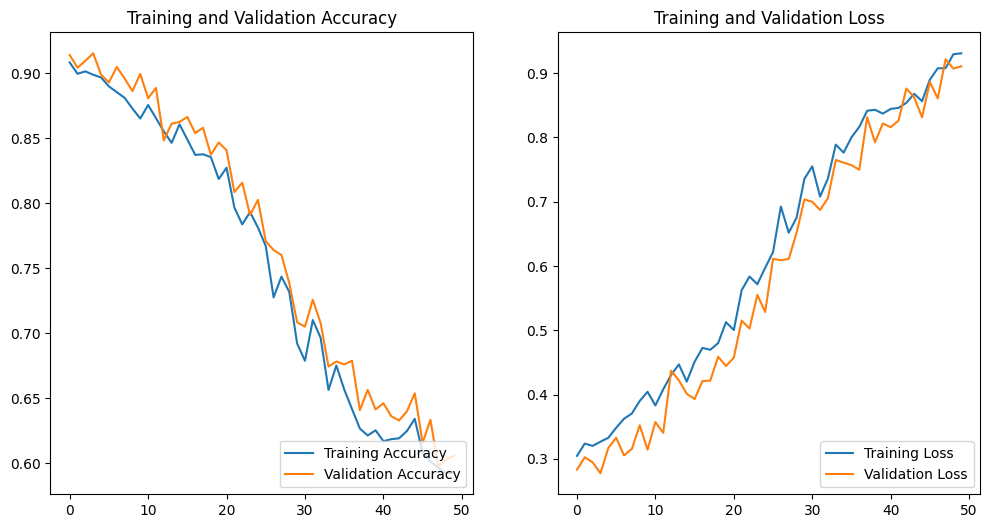

In [23]:
# Evaluate the model
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
EPOCHS_SIZE=50
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS_SIZE),acc, label="Training Accuracy")
plt.plot(range(EPOCHS_SIZE),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS_SIZE),loss, label="Training Loss")
plt.plot(range(EPOCHS_SIZE),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [14]:
# Definição da arquitetura da rede neural
model = Sequential()

# Primeira camada RNN com ativação 'tanh'
model.add(SimpleRNN(50, input_shape=(50, X_train.shape[2]), activation='tanh', return_sequences=True))

# Dropout para regularização
model.add(Dropout(0.5))

# Segunda camada RNN com ativação 'tanh'
model.add(SimpleRNN(50, activation='tanh'))

# Dropout para regularização
model.add(Dropout(0.5))

# Camada de saída
model.add(Dense(y_train.shape[1], activation='softmax'))


# Compilação do modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Sumário do modelo
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 50, 50)         │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,355 (32.64 KB)

 Trainable params: 8,355 (32.64 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 96s 6ms/step - accuracy: 0.7775 - loss: 0.5718 - val_accuracy: 0.9219 - val_loss: 0.2588
Epoch 2/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 94s 6ms/step - accuracy: 0.9073 - loss: 0.3090 - val_accuracy: 0.9312 - val_loss: 0.2405
Epoch 3/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 96s 6ms/step - accuracy: 0.9166 - loss: 0.2824 - val_accuracy: 0.9362 - val_loss: 0.2200
Epoch 4/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 118s 7ms/step - accuracy: 0.9186 - loss: 0.2758 - val_accuracy: 0.9336 - val_loss: 0.2262
Epoch 5/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 132s 8ms/step - accuracy: 0.9183 - loss: 0.2750 - val_accuracy: 0.9288 - val_loss: 0.2351
Epoch 6/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 91s 6ms/step - accuracy: 0.9185 - loss: 0.2751 - val_accuracy: 0.9188 - val_loss: 0.2687
Epoch 7/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 94s 6ms/step - accuracy: 0.9157 - loss: 0.2811 - val_accuracy: 0.9173 - val_loss: 0.2669
Epoch 8/50
15836/15836 ━━━━━━━━━━━━━━━━━━━━ 100s 6ms/step - accurac